In [1]:
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset
x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

11490434/11490434 [==============================] - 0s 0us/step


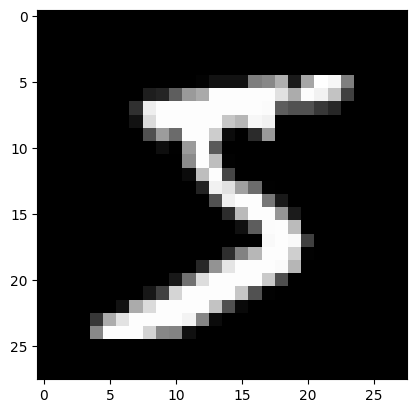

In [3]:
plt.imshow(x_train[0], cmap="gray")

In [33]:
def autoencoder_create():
  #encoderpart
  encoder_input = keras.Input(shape=(28, 28, 1), name='img')
  x = keras.layers.Flatten()(encoder_input)
  encoder_output = keras.layers.Dense(64, activation="relu")(x)
  encoder = keras.Model(encoder_input, encoder_output, name='encoder')
  #decoderpart
  decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
  x = keras.layers.Dense(784, activation="sigmoid")(decoder_input)
  decoder_output = keras.layers.Reshape((28, 28, 1))(x)
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000000000,
    decay_rate=1e-6)
  opt = tf.keras.optimizers.Adam(lr_schedule)
  return keras.Model(encoder_input, decoder_output, name='autoencoder'), opt, encoder

In [34]:
autoencoder,opt, encoder = autoencoder_create()

In [35]:
autoencoder.summary()

epochs = 5

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 784)               50960     
                                                                 
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [36]:

autoencoder.compile(opt, loss='mse')
for epoch in range(epochs):

  history = autoencoder.fit(
    x_train,
    x_train,
    epochs=1, 
    batch_size=32, validation_split=0.10
      )   
  autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 10s 5ms/step - loss: 0.0186 - val_loss: 0.0124


1688/1688 [==============================] - 9s 5ms/step - loss: 0.0116 - val_loss: 0.0116


1688/1688 [==============================] - 8s 5ms/step - loss: 0.0112 - val_loss: 0.0110


1688/1688 [==============================] - 8s 5ms/step - loss: 0.0108 - val_loss: 0.0111


1688/1688 [==============================] - 8s 5ms/step - loss: 0.0108 - val_loss: 0.0103


In [37]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

1/1 [==============================] - 0s 54ms/step


In [39]:
print(example[0].shape)
print(example[0])

(64,)
[0.6751566  0.         0.7857231  1.7377427  2.774129   4.9856753
 0.58372176 2.2027655  1.0402203  1.6963514  0.         1.7423773
 0.         0.         0.         4.2756433  0.         0.
 0.         0.         4.137318   0.8460165  0.11572971 0.
 1.2979872  3.7455034  3.733972   8.05626    4.9042373  1.6317742
 0.9605174  0.         0.930856   1.2050109  0.         7.2523375
 1.4798733  0.         0.         0.         0.         1.5572263
 0.         0.5862725  0.         2.3873758  1.5806131  1.6609681
 1.6169885  2.7324772  0.9008496  0.         0.         3.1551776
 0.         0.         0.         3.7590382  0.6161568  0.
 0.         0.         0.         5.85188   ]


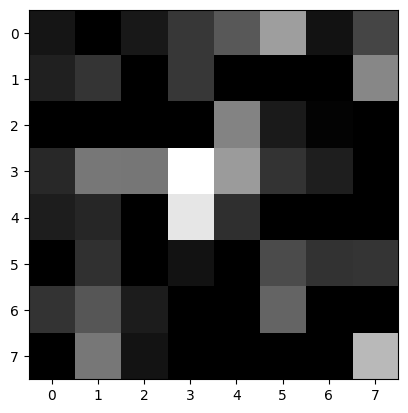

In [40]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

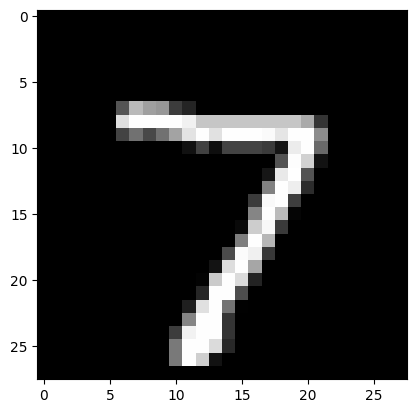

In [41]:
plt.imshow(x_test[0], cmap="gray")

1/1 [==============================] - 0s 85ms/step


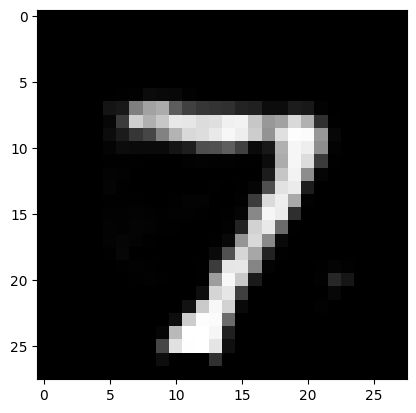

In [42]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")